In [36]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [37]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
cars_df=pd.read_csv("cars-dataset.csv")

In [98]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [99]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [100]:
# Removing car name as it is irrelevant 
cars_df=cars_df.drop(columns="car name")

In [101]:
# On inspecting records number 32, 126, 330,336, 354,374  we find "?" in the columns.
cars_df[cars_df["hp"].str.isnumeric()==False]

,cyl,disp,hp,wt,acc,yr,mpg
32,4,98.0,?,2046,19.0,71,25.0
126,6,200.0,?,2875,17.0,74,21.0
330,4,85.0,?,1835,17.3,80,40.9
336,4,140.0,?,2905,14.3,80,23.6
354,4,100.0,?,2320,15.8,81,34.5
374,4,151.0,?,3035,20.5,82,23.0


In [102]:
#Replace them with nan and remove the records from the data frame that have "nan"
cars_df = cars_df.replace('?', np.nan)

In [103]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      392 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [104]:
#instead of dropping the rows having na, lets replace the missing values with median value. 
# replace the missing values in 'hp' with median value of 'hp' :Note, we do not need to specify the column names
# every column's missing value is replaced with that column's median respectively per Cylinder type  (axis =0 means columnwise)
# We can see that Cylinder tppes 4 and 6 have missing values here, hence their respective medians are used

cars_df[cars_df["cyl"]==4].hp.median()
cars_df[cars_df["cyl"]==6].hp.median()

cars_df["hp"] = np.where((cars_df["hp"].isna()==True) & (cars_df["cyl"]==4),cars_df[cars_df["cyl"]==4].hp.median(),cars_df["hp"])

cars_df["hp"] = np.where((cars_df["hp"].isna()==True) & (cars_df["cyl"]==6),cars_df[cars_df["cyl"]==6].hp.median(),cars_df["hp"])


78.0

100.0

In [105]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null object
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 21.8+ KB


In [106]:
cars_df['hp'] = cars_df['hp'].astype('float64')  # converting the hp column from object / string type to float


In [107]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [108]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,104.125628,38.313624,46.0,76.000,92.0,125.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C682167438>,
      dtype=object)

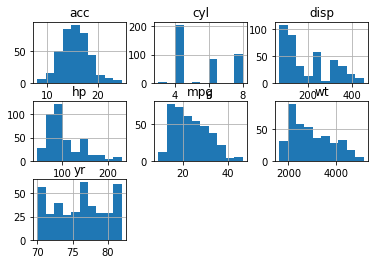

In [109]:
cars_df.hist()

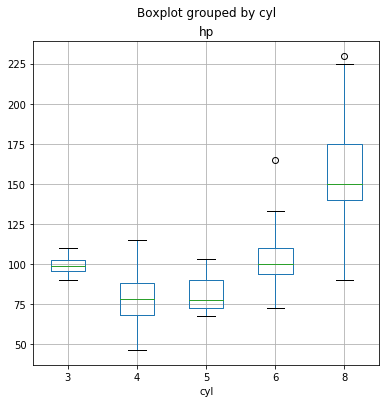

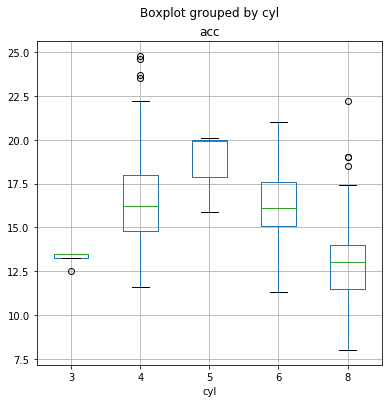

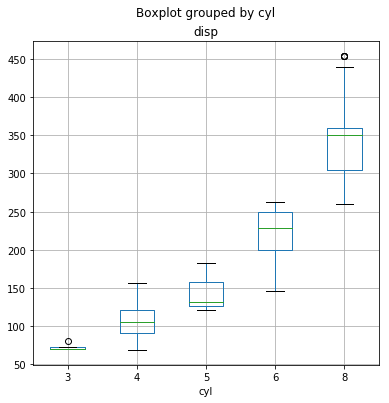

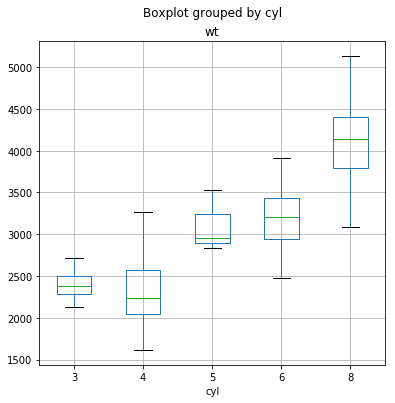

In [110]:
# Check for any outliers 
for col in ("hp","acc","disp","wt"):
    cars_df.boxplot(col,by="cyl",figsize=(6,6))
    plt.show()
##Seems to have outliers for columns HP, DISP and ACC for each cylinder. Will cap the outliers to the medians

In [111]:
# Validate if DISP has real outliers
Q1=cars_df[cars_df["cyl"]==8].disp.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==8].disp.quantile(0.75)
IQR = Q3-Q1

In [112]:
Q3+IQR*1.5
Q1-IQR*1.5
Q1

442.5

222.5

305.0

In [113]:
# Disp doesn't seem to be a real outlier for CYL=8
cars_df[((cars_df.disp < (Q1 - 1.5 * IQR)) |(cars_df.disp > (Q3 + 1.5 * IQR)))].disp.count()
cars_df[((cars_df.disp > (Q3 + 1.5 * IQR)))]


244

,cyl,disp,hp,wt,acc,yr,mpg
6,8,454.0,220.0,4354,9.0,70,14.0
8,8,455.0,225.0,4425,10.0,70,14.0
13,8,455.0,225.0,3086,10.0,70,14.0
95,8,455.0,225.0,4951,11.0,73,12.0


In [114]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==3].disp.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==3].disp.quantile(0.75)
IQR = Q3-Q1

# Disp doesn't seem to be a real outlier for CYL=3
cars_df[((cars_df.disp < (Q1 - 1.5 * IQR)) |(cars_df.disp > (Q3 + 1.5 * IQR)))].disp.count()
cars_df[((cars_df.disp > (Q3 + 1.5 * IQR)))].disp.count()

390

390

In [115]:
IQR

2.5

In [116]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==3].acc.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==3].acc.quantile(0.75)
IQR = Q3-Q1

# Acc doesn't seem to be a real outlier for CYL=3
cars_df[((cars_df.acc < (Q1 - 1.5 * IQR)) |(cars_df.acc > (Q3 + 1.5 * IQR)))].acc.count()
cars_df[((cars_df.acc > (Q3 + 1.5 * IQR)))].acc.count()

355

298

In [117]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==4].acc.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==4].acc.quantile(0.75)
IQR = Q3-Q1
IQR
# Acc doesn't seem to be a real outlier for CYL=4
cars_df[((cars_df.acc < (Q1 - 1.5 * IQR)) |(cars_df.acc > (Q3 + 1.5 * IQR)))].acc.count()
cars_df[((cars_df.acc > (Q3 + 1.5 * IQR)))]

3.1999999999999993

14

,cyl,disp,hp,wt,acc,yr,mpg
59,4,97.0,54.0,2254,23.5,72,23.0
299,4,141.0,71.0,3190,24.8,79,27.2
326,4,90.0,48.0,2335,23.7,80,43.4
394,4,97.0,52.0,2130,24.6,82,44.0


In [118]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==8].acc.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==8].acc.quantile(0.75)
IQR = Q3-Q1
IQR
# Acc doesn't seem to be a real outlier for CYL=8
cars_df[((cars_df.acc < (Q1 - 1.5 * IQR)) |(cars_df.acc > (Q3 + 1.5 * IQR)))].acc.count()
cars_df[((cars_df.acc > (Q3 + 1.5 * IQR)))].acc.count()

2.5

80

80

In [119]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==6].hp.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==6].hp.quantile(0.75)
IQR = Q3-Q1
IQR
# HP doesn't seem to be a real outlier for CYL=6
cars_df[((cars_df.hp < (Q1 - 1.5 * IQR)) |(cars_df.hp > (Q3 + 1.5 * IQR)))].hp.count()
cars_df[((cars_df.hp > (Q3 + 1.5 * IQR)))].hp.count()

16.25

148

89

In [120]:
# Validate if they are real outliers
Q1=cars_df[cars_df["cyl"]==8].hp.quantile(0.25)
Q3=cars_df[cars_df["cyl"]==8].hp.quantile(0.75)
IQR = Q3-Q1
IQR
# HP has one outlier on the upper side
cars_df[((cars_df.hp < (Q1 - 1.5 * IQR)) |(cars_df.hp > (Q3 + 1.5 * IQR)))].hp.count()
cars_df[((cars_df.hp > (Q3 + 1.5 * IQR)))]

35.0

154

,cyl,disp,hp,wt,acc,yr,mpg
116,8,400.0,230.0,4278,9.5,73,16.0


After all the EDA, it appears that the outliers shown for Acc and Disp are not real outliers. 
There is only one record for HP which is an outlier. The HP value is shown as 230 which is 35 points above the 75th Quantile.
This value will be capped to the Q3+1.5*IQR value

In [121]:
# HP Outlier treatment - Capp the one value to Q3+1.5*IQR
cars_df["hp"]=np.where(cars_df.hp > (Q3 + 1.5 * IQR),Q3 + 1.5 * IQR,cars_df["hp"])

In [122]:
cars_df.corr()

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.843986,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.897674,0.932824,-0.543684,-0.370164,-0.804203
hp,0.843986,0.897674,1.000000,0.863816,-0.688091,-0.416916,-0.775847
wt,0.896017,0.932824,0.863816,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.688091,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.416916,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.775847,-0.831741,0.420289,0.579267,1.000000


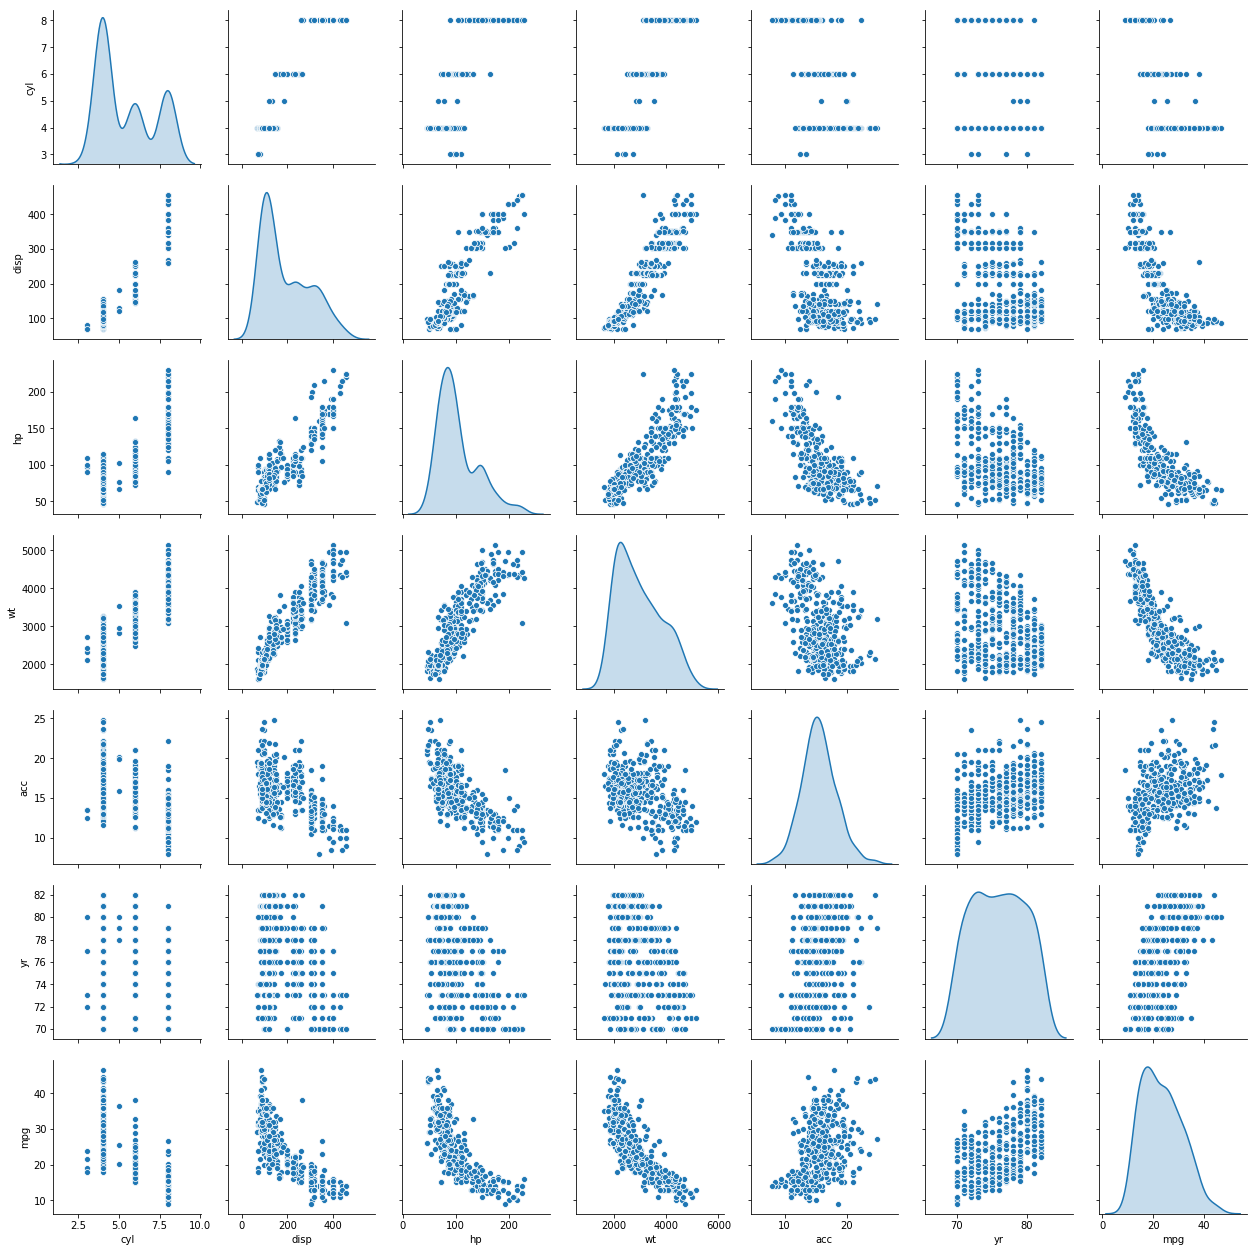

In [99]:
sns.pairplot(cars_df,diag_kind='kde',kind='scatter')

# It is clear from the above EDA that CYL and Disp are highly correlated. One of them cane be dropped. However, for unsupervised learning, it's best to run the algorithm on raw data

In [123]:
# Let us check optimal number of clusters-


cluster_range = range( 2, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 10
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_df)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia
  


# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

,num_clusters,cluster_errors
0,2,7.429839e+07
1,3,3.420793e+07
2,4,1.905562e+07
3,5,1.375753e+07
4,6,1.032729e+07
5,7,7.695085e+06
6,8,5.660957e+06
7,9,4.725682e+06


<Figure size 864x432 with 0 Axes>

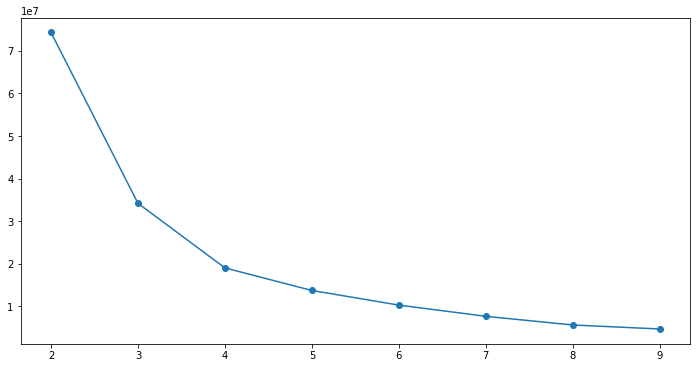

In [124]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [125]:
# Number of clusters are identified as 3 which is shown in the elbow plot as coordinates (4,2)

kmeans = KMeans(n_clusters=3)

# Fitting the input data

kmeans = kmeans.fit(cars_df)

# Getting the cluster labels

labels = kmeans.predict(cars_df)

# Centroid values

centroids = kmeans.cluster_centers_



# Comparing with scikit-learn centroids

print("Centroid values")


print("sklearn")

print(centroids) # From sci-kit learn

Centroid values
sklearn
[[4.03846154e+00 1.06953297e+02 7.70824176e+01 2.21767033e+03
  1.63587912e+01 7.67307692e+01 2.97510989e+01]
 [7.86666667e+00 3.44144444e+02 1.57783333e+02 4.23632222e+03
  1.34633333e+01 7.40111111e+01 1.46355556e+01]
 [5.77777778e+00 2.10674603e+02 1.04841270e+02 3.15352381e+03
  1.59293651e+01 7.63968254e+01 2.08484127e+01]]


In [126]:
colnames = cars_df.columns
prediction= kmeans.predict(cars_df)
#X["clusters"] = prediction
X_df = pd.DataFrame(cars_df, columns= colnames)
X_df["group"] = prediction


In [127]:
X_df

,cyl,disp,hp,wt,acc,yr,mpg,group
0,8,307.0,130.0,3504,12.0,70,18.0,2
1,8,350.0,165.0,3693,11.5,70,15.0,1
2,8,318.0,150.0,3436,11.0,70,18.0,2
3,8,304.0,150.0,3433,12.0,70,16.0,2
4,8,302.0,140.0,3449,10.5,70,17.0,2
5,8,429.0,198.0,4341,10.0,70,15.0,1
6,8,454.0,220.0,4354,9.0,70,14.0,1
7,8,440.0,215.0,4312,8.5,70,14.0,1
8,8,455.0,225.0,4425,10.0,70,14.0,1
9,8,390.0,190.0,3850,8.5,70,15.0,1


In [128]:
labels

array([2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2,

In [129]:
for i in cluster_range:
    points = np.array(X_df.loc[X_df['group'] == i])
    
points

array([], shape=(0, 8), dtype=float64)

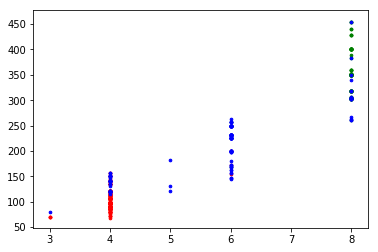

In [130]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
c = np.array([3,3])

rang=range(0,3)
for i in rang:
        points = np.array(X_df.loc[X_df['group'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C683D804A8>,
      dtype=object)

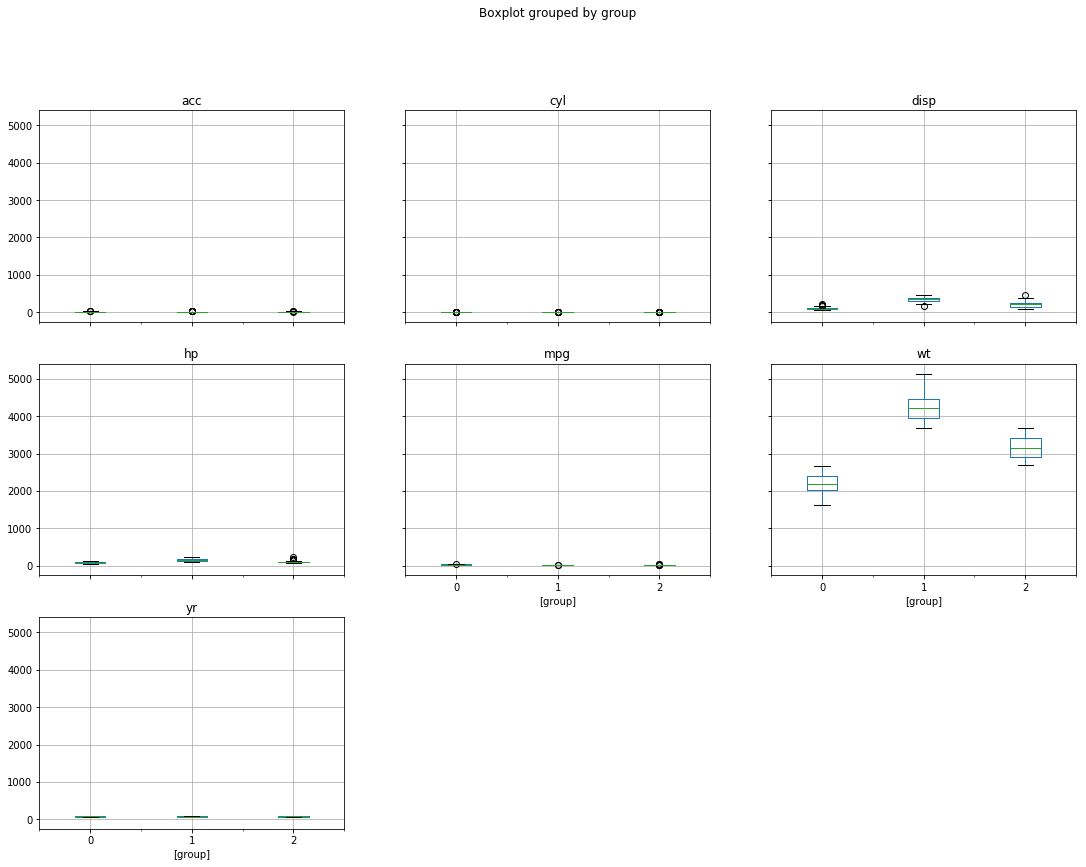

In [131]:


X_df.boxplot(by = 'group',  layout=(4,3), figsize=(18, 18))

## Identify and separate the clusters. The number of clusters are identified as 3 and they are separated out to three datasets cl_1, cl_2, cl_3 respectively

In [132]:
cl_1=X_df[X_df["group"]==0].drop(columns="group")

In [133]:
cl_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 14 to 396
Data columns (total 7 columns):
cyl     182 non-null int64
disp    182 non-null float64
hp      182 non-null float64
wt      182 non-null int64
acc     182 non-null float64
yr      182 non-null int64
mpg     182 non-null float64
dtypes: float64(4), int64(3)
memory usage: 11.4 KB


In [134]:
cl_2=X_df[X_df["group"]==1].drop(columns="group")

In [135]:
cl_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 364
Data columns (total 7 columns):
cyl     90 non-null int64
disp    90 non-null float64
hp      90 non-null float64
wt      90 non-null int64
acc     90 non-null float64
yr      90 non-null int64
mpg     90 non-null float64
dtypes: float64(4), int64(3)
memory usage: 5.6 KB


In [136]:
cl_3=X_df[X_df["group"]==2].drop(columns="group")

In [137]:
cl_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 397
Data columns (total 7 columns):
cyl     126 non-null int64
disp    126 non-null float64
hp      126 non-null float64
wt      126 non-null int64
acc     126 non-null float64
yr      126 non-null int64
mpg     126 non-null float64
dtypes: float64(4), int64(3)
memory usage: 7.9 KB


In [138]:
#cl_4=X_df[X_df["group"]==3].drop(columns="group")
#cl_4.info()

## Linear Regression for the clusters individually

In [160]:
# Initiate the Liniear Regression algorithm

In [139]:
lnr=LinearRegression()

## Cluster 1 (cl_1)

In [140]:
# splitting data into training and test set for independent attributes



X =  cl_1.drop("mpg", axis=1)
y =  cl_1.pop("mpg")

In [141]:
train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

In [142]:
lnr.fit(train_set, train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [143]:
lnr.score(train_set , train_labels) 

0.7222192286151546

In [144]:
lnr.coef_
lnr.intercept_

array([ 4.83058288, -0.07337798, -0.00638734, -0.00810634,  0.06637609,
        1.01360771])

-42.43740547563279

In [145]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))

The coefficient for cyl is 4.830582875708736
The coefficient for disp is -0.07337797984430453
The coefficient for hp is -0.006387340077161447
The coefficient for wt is -0.00810633773541632
The coefficient for acc is 0.06637609285718214
The coefficient for yr is 1.013607708679356


In [146]:
# Let us check the intercept for the model

intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -42.43740547563279


In [147]:
lnr.predict(test_set)

array([30.78317274, 30.18319496, 25.69719661, 32.36851098, 20.66335271,
       37.68173382, 22.01059487, 29.94180744, 35.23315123, 25.46136462,
       23.48387736, 28.14038202, 34.69812865, 22.82090914, 32.10854422,
       18.71163646, 32.38459128, 19.85935218, 21.34026326, 30.11466863,
       33.707747  , 31.85035473, 35.96973138, 32.55300116, 31.12087146,
       31.44097353, 32.23165128, 30.43604768, 29.37282067, 31.95783549,
       32.90626957, 26.25682737, 24.01460259, 25.62343105, 27.08888848,
       20.67521383, 35.64342871, 38.0085612 , 30.151709  , 24.72309518,
       33.89280331, 31.40430009, 26.59389645, 28.74949727, 33.39317864,
       33.81957764, 24.16328503, 36.84635222, 31.73540773, 29.91874318,
       21.08772246, 21.66201184, 26.13123919, 29.24440574, 30.06722268])

In [148]:
lnr.score(test_set,test_labels)

0.4961311011327362

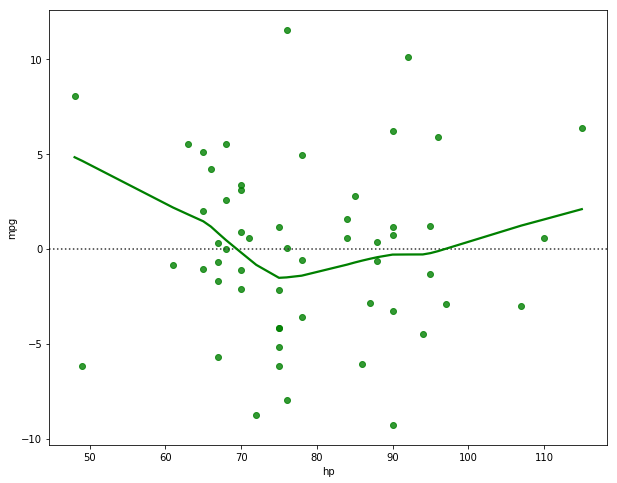

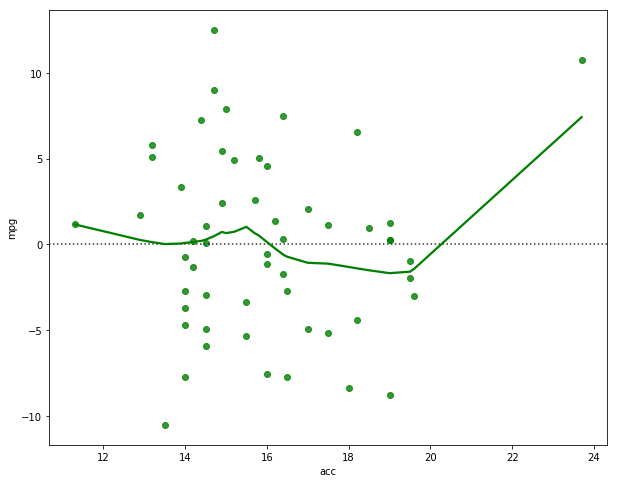

In [149]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

# Cluster 2 (cl_2)

In [150]:
X =  cl_2.drop("mpg", axis=1)
y =  cl_2.pop("mpg")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

lnr.fit(train_set, train_labels)

lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.7023359630508261

The coefficient for cyl is -0.120218424358843
The coefficient for disp is 0.012871771106533987
The coefficient for hp is -0.02114654547368177
The coefficient for wt is -0.003226853189605732
The coefficient for acc is -0.00998850548565195
The coefficient for yr is 0.38514734035189463
The intercept for our model is -0.15555863716446083


In [151]:
lnr.predict(test_set)
lnr.score(test_set,test_labels)


array([16.24690261, 15.77295365, 12.88974937, 14.03076691, 17.92753749,
       15.66909996, 16.4929871 , 14.23309789, 13.43695041, 12.01110923,
       15.49196236, 15.43877952, 16.65436637, 14.45240184, 12.72649841,
       16.38801088, 10.22048629, 12.89493653, 20.15455141, 16.81846042,
       14.1447217 , 13.79175216, 18.03710043, 13.96667625, 15.60701039,
       14.80087404, 15.13545532])

0.5409767184510417

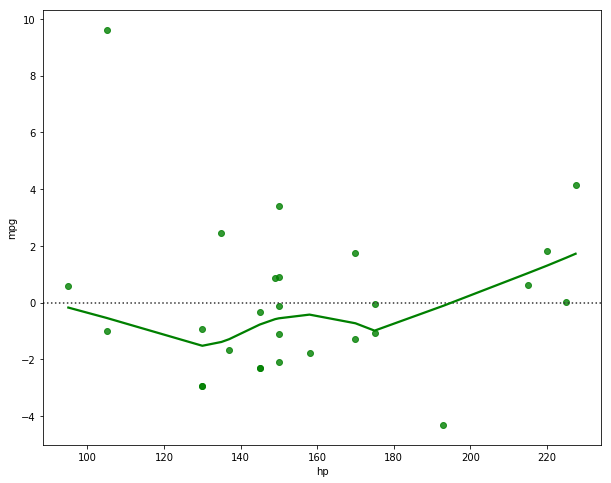

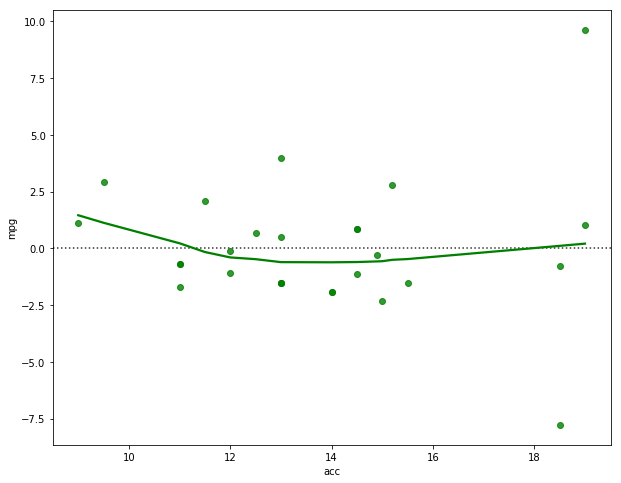

In [152]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

# Cluster 3 (cl_3)

In [153]:
X =  cl_3.drop("mpg", axis=1)
y =  cl_3.pop("mpg")

train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

lnr.fit(train_set, train_labels)

lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(train_set.columns):
    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
intercept = lnr.intercept_

print("The intercept for our model is {}".format(intercept))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.5849961671460852

The coefficient for cyl is 0.1825360659134003
The coefficient for disp is -0.002321602257190146
The coefficient for hp is -0.057965069280984896
The coefficient for wt is -0.004524646413610637
The coefficient for acc is -0.279537023943426
The coefficient for yr is 0.6865757651619431
The intercept for our model is -7.295596388960888


In [154]:
lnr.predict(test_set)
lnr.score(test_set,test_labels)


array([25.39297424, 20.25656539, 24.12891675, 21.84948458, 22.4612926 ,
       21.34552439, 25.39911242, 27.43919928, 23.64465117, 19.78620793,
       24.0314875 , 20.08821905, 23.33898755, 17.03762546, 23.05264448,
       26.52843076, 24.94959873, 25.21776376, 25.98264501, 13.9369128 ,
       18.19322134, 26.37283209, 24.89347106, 21.41670304, 18.38296929,
       20.03427044, 23.91422177, 17.91880012, 18.77092656, 21.86502723,
       20.5849114 , 21.71836494, 22.63145676, 21.17956856, 23.93488046,
       26.23351785, 20.75869319, 18.00198401])

0.5069905744052673

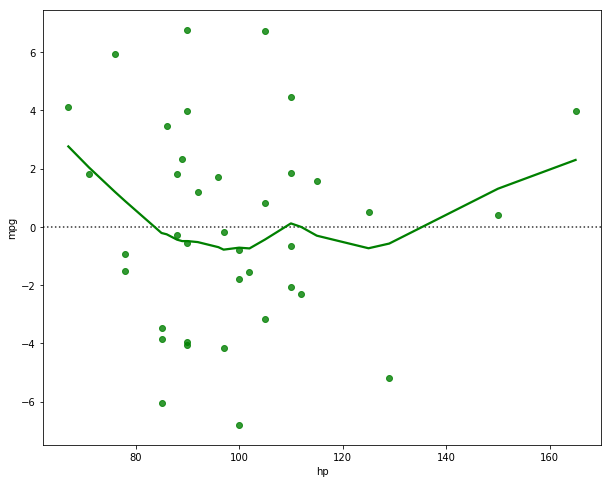

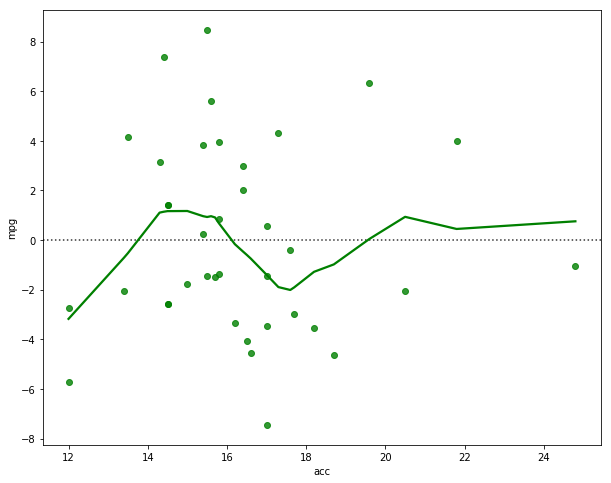

In [155]:
fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


fig = plt.figure(figsize=(10,8))
sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )

In [156]:
# Cluster 4 (cl_4)

In [157]:
#X =  cl_4.drop("mpg", axis=1)
#y =  cl_4.pop("mpg")

#train_set, test_set, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=1)

#lnr.fit(train_set, train_labels)

#lnr.score(train_set , train_labels) 

# Let us explore the coefficients for each of the independent attributes

#for idx, col_name in enumerate(train_set.columns):
#    print("The coefficient for {} is {}".format(col_name, lnr.coef_[idx]))
    
#intercept = lnr.intercept_

#print("The intercept for our model is {}".format(intercept))

In [158]:
#lnr.predict(test_set)
#lnr.score(test_set,test_labels)

In [159]:
#fig = plt.figure(figsize=(10,8))
#sns.residplot(x= test_set['hp'], y= test_labels, color='green', lowess=True )


#fig = plt.figure(figsize=(10,8))
#sns.residplot(x= test_set['acc'], y= test_labels, color='green', lowess=True )